In [ ]:
import pandas as pd
import numpy as np
from filegenerators import *
pd.options.display.float_format = '{:.2e}'.format
from pathlib import Path
from CovCor_calc import OptimaMechtest, OptimaOutput, OptimaSensitivity
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from scipy.linalg import sqrtm, logm
pd.set_option('display.float_format', '{:.6e}'.format)

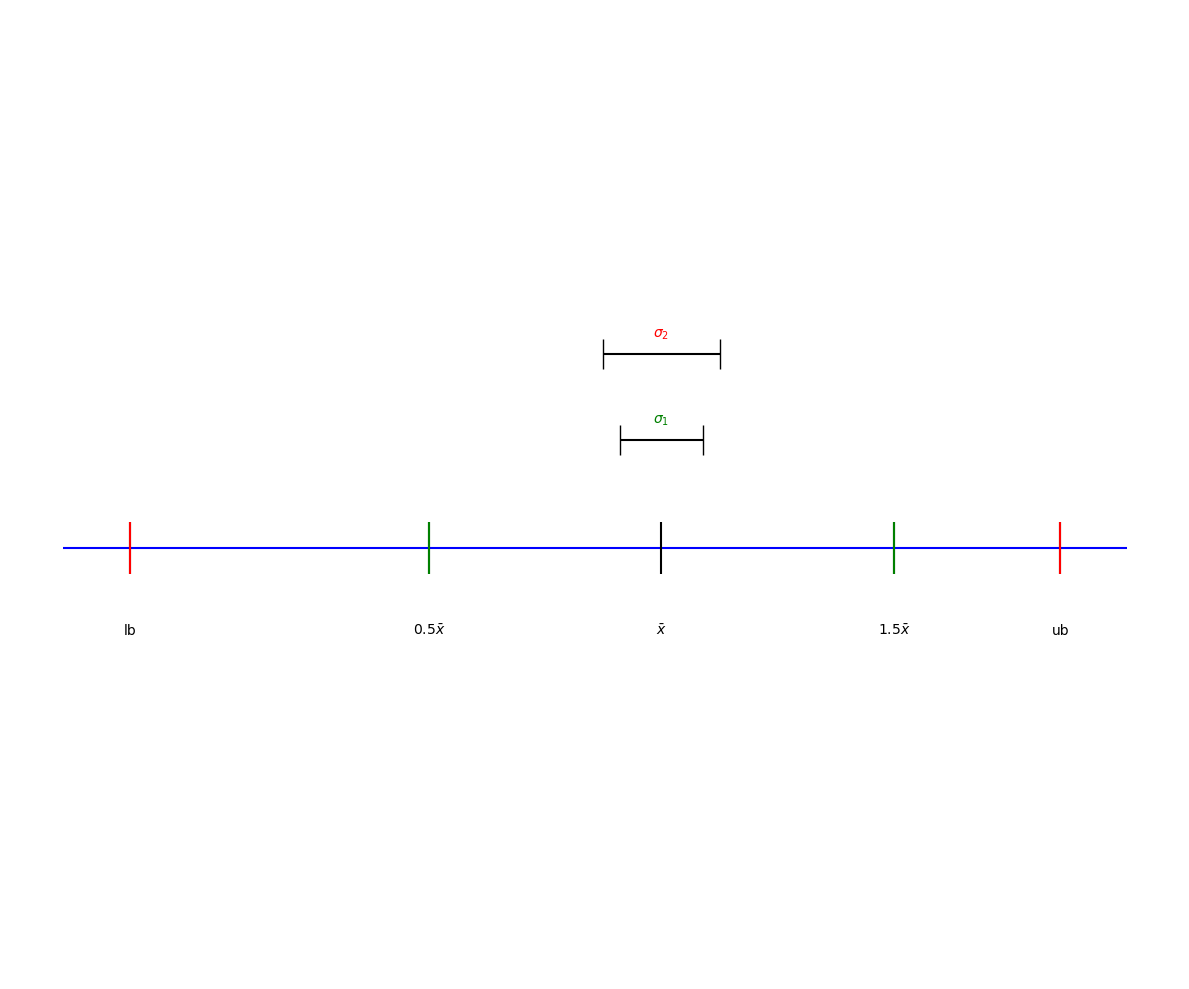

In [4]:
import matplotlib.pyplot as plt

# Define mean and bounds
x_bar = 1.0  # mean
lower_bound = 0.2
upper_bound = 1.6

# Slightly extended short range
half_range_factor = 0.35
half_range_start = x_bar - half_range_factor
half_range_end = x_bar + half_range_factor
half_range_length = half_range_end - half_range_start
full_range_length = upper_bound - lower_bound

# Sigma line heights closer to axis
sigma1_height = 0.025
sigma2_y = sigma1_height + 0.02  # stacked closer
sigma2_height = 0.125 * full_range_length

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Main axis
ax.hlines(0, lower_bound - 0.1, upper_bound + 0.1, color='blue')

# Tick marks and labels
xticks = [lower_bound, half_range_start, x_bar, half_range_end, upper_bound]
xlabels = ['lb', r'$0.5\bar{x}$', r'$\bar{x}$', r'$1.5\bar{x}$', 'ub']
for x, label in zip(xticks, xlabels):
    ax.vlines(x, -0.006, 0.006, color='black')
    ax.text(x, -0.02, label, ha='center')
ax.vlines(lower_bound, -0.006, 0.006, color='red')
ax.vlines(upper_bound, -0.006, 0.006, color='red')
ax.vlines(half_range_start, -0.006, 0.006, color='green')
ax.vlines(half_range_end, -0.006, 0.006, color='green')

# Sigma_1 line
ax.hlines(sigma1_height, x_bar - 0.0625, x_bar + 0.0625, color='black', linewidth=1.5)
ax.vlines([x_bar - 0.0625, x_bar + 0.0625], sigma1_height - 0.0035, sigma1_height + 0.0035, color='black', linewidth=1)
ax.text(x_bar, sigma1_height + 0.004, r'$\sigma_1$', ha='center', color='green')

# Sigma_2 line
ax.hlines(sigma2_y, x_bar - 0.0875, x_bar + 0.0875, color='black', linewidth=1.5)
ax.vlines([x_bar - 0.0875, x_bar + 0.0875], sigma2_y - 0.0035, sigma2_y + 0.0035, color='black', linewidth=1)
ax.text(x_bar, sigma2_y + 0.004, r'$\sigma_2$', ha='center', color='red')

#fig.patch.set_facecolor('#f8f6f6')

# Aesthetics
ax.set_ylim(-0.1, sigma2_y + 0.08)
ax.axis('off')
plt.tight_layout()
plt.show()


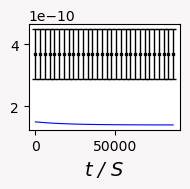

In [59]:
# Sample time vector
t = np.linspace(0, 86400, 30)  # from 0 to 24 hours in 30 points

# Measured data (constant with error bars)
measured_mean = np.full_like(t, 3.7e-10)
measured_err = np.full_like(t, 8e-11)

# Model prediction (decreasing over time)
predicted = 1.4e-10 + 1e-11 * np.exp(-t / 20000)

# Plot
fig, ax = plt.subplots(figsize=(2, 2))
fig.patch.set_facecolor('#f8f6f6')  # Canvas background color

# Error bars for measured data
ax.errorbar(t, measured_mean, yerr=measured_err, fmt='s', color='black',
            ecolor='black', elinewidth=1, capsize=2, label='measured',
            markersize=2)

# Model prediction line
ax.plot(t, predicted, color='blue', label='BCRN6', linewidth=0.8)

# Axis labels
ax.set_xlabel(r'$t$ / S', fontsize=14, style='italic')
ax.set_ylabel('', fontsize=12)

# Log-like y scale with scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Legend
#ax.legend(loc='upper center', frameon=False, fontsize=10)

# Tight layout
plt.tight_layout()
plt.show()
